In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
import time
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30

In [28]:
dp = pd.read_csv('/home/mying/Desktop/ObservationalData/M92_fitstars.dat',sep='\s+',names=['v','i','vi'],skiprows=3)
dp

,v,i,vi
0,15.926000,15.268000,0.658
1,15.927000,15.268000,0.659
2,15.927000,15.262000,0.665
3,15.931000,15.270001,0.661
4,15.932000,15.250000,0.682
...,...,...,...
18072,19.924999,19.403999,0.521
18073,19.924999,19.414000,0.511
18074,19.924999,19.396999,0.528
18075,19.924999,19.419001,0.506


In [29]:
dp1 = dp[dp['v'] > 16.925]
dp2 = dp1[dp1['v'] < 18.925]
dp2.to_csv('/home/mying/Desktop/M92-main/M92_fit_cut.dat',index=False)

In [30]:
pd.read_csv('M92_fit_cut.dat')

,v,i,vi
0,16.927000,16.304001,0.623
1,16.927999,16.313999,0.614
2,16.930000,16.313999,0.616
3,16.931999,16.312000,0.620
4,16.934999,16.315001,0.620
...,...,...,...
6728,18.924999,18.474001,0.451
6729,18.924999,18.476999,0.448
6730,18.924999,18.458000,0.467
6731,18.924999,18.482000,0.443


In [11]:
dp['vi'] > 17)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [33]:
dp = pd.read_csv('inputparams1',sep='\s+',names=['1','2','num','age'])
dp

,1,2,num,age
0,python,runlauncher.py,10002,13600
1,python,runlauncher.py,10029,13400
2,python,runlauncher.py,10045,13000
3,python,runlauncher.py,10045,14000
4,python,runlauncher.py,10096,13600
...,...,...,...,...
1095,python,runlauncher.py,19994,13200
1096,python,runlauncher.py,19994,14000
1097,python,runlauncher.py,19994,14200
1098,python,runlauncher.py,19997,13400


In [34]:
ages=['12600', '12800', '13000', '13200', '13400', '13600', '13800', '14000', '14200', '14400', '14600', '14800', '15000', '15200', '15400']
param_list = []
for mc_num in dp['num'].values:
    for age in ages:
        param_list.append((str(mc_num),age))
f = open("inputparams", "w")
for i in range(len(param_list)):
    f.write("python runlauncher.py {} {}\n".format(param_list[i][0], param_list[i][1]))
f.close()

In [35]:
import os

In [36]:
os.listdir('/home/mying/Desktop/outchi2_ref')

['bin_mc15613.age13800',
 'chi2_a14400_mc19966',
 'chi2_a13600_mc12545',
 'bin_mc11872.age15400',
 'chi2_a14000_mc14157',
 'chi2_a13200_mc14849',
 'bin_mc17051.age13200',
 'chi2_a15000_mc10535',
 'chi2_a15400_mc19629',
 'bin_mc14504.age14600',
 'chi2_a12800_mc15699',
 'chi2_a14200_mc19824',
 'chi2_a13800_mc13532',
 'bin_mc13512.age12800',
 'chi2_a14000_mc19881',
 'chi2_a13800_mc11718',
 'bin_mc13971.age14200',
 'bin_mc13522.age15400',
 'bin_mc12933.age15400',
 'bin_mc11449.age13400',
 'chi2_a13000_mc17919',
 'bin_mc18364.age13600',
 'chi2_a14800_mc15681',
 'chi2_a14600_mc16758',
 'bin_mc17702.age15000',
 'chi2_a13000_mc19863',
 'chi2_a14000_mc10608',
 'chi2_a14600_mc17574',
 'bin_mc13828.age14200',
 'chi2_a15400_mc19005',
 'chi2_a15400_mc19909',
 'chi2_a15200_mc11961',
 'chi2_a15200_mc11354',
 'chi2_a15200_mc10775',
 'bin_mc17134.age15000',
 'chi2_a13600_mc17156',
 'bin_mc15844.age13000',
 'chi2_a15200_mc10686',
 'chi2_a13400_mc15889',
 'bin_mc15095.age13000',
 'chi2_a12800_mc16214',
 

In [49]:
dp.sort_values(by=['chi2']).iloc[0].values

array([0.00000000e+00, 1.50000000e+04, 1.46200000e+01, 0.00000000e+00,
       1.02562476e+04])

In [39]:
dp = pd.read_csv('/home/mying/Desktop/outchi2_ref/chi2_a15400_mc19629')
np.min(dp['chi2'].values)

29649.650589241788

In [241]:
os.chdir('/home/mying/Desktop/outchi2_ref')
chi2_min = []
for item in os.listdir('/home/mying/Desktop/outchi2_ref'):
    if item[:4] == 'chi2':
        age = item[6:11]
        mc_num = item[-5:]
        dp = pd.read_csv(item)
        dp = dp.sort_values(by=['chi2'])
        for i in range(len(dp)):
            if dp['chi2'].values[i] < 3172+5*39:
                chi2_min.append(np.append(dp.iloc[i].values,int(mc_num)))
            else:
                break

In [229]:
len(chi2_min)

4654

In [45]:
count = 0
for item in chi2_min:
    if item < 2000:
        count += 1
count

79

In [92]:
dp.iloc[0]['age'] = 1000
dp.iloc[0]

<ipython-input-92-65936565099b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp.iloc[0]['age'] = 1000


Unnamed: 0       85.000000
age           13000.000000
dm               14.760000
red               0.010000
chi2           3701.114582
Name: 85, dtype: float64

In [244]:
dp = pd.DataFrame(data=chi2_min, columns =['idx','age','dm','red','chi2','mc_num'])
dp_val = dp.sort_values(by=['chi2'])
dp_val

,idx,age,dm,red,chi2,mc_num
21795,19.0,15200.0,14.65,0.01,1817.071809,19614.0
22670,0.0,14800.0,14.62,0.00,1830.973123,14601.0
9328,18.0,14600.0,14.65,0.00,1833.093756,19231.0
10043,63.0,14400.0,14.72,0.03,1856.018498,19862.0
13337,31.0,14600.0,14.67,0.01,1865.734721,19242.0
...,...,...,...,...,...,...
19152,60.0,13400.0,14.72,0.00,3366.889505,12598.0
25752,50.0,13400.0,14.70,0.02,3366.903480,17181.0
13129,38.0,14600.0,14.68,0.02,3366.920341,19729.0
18544,62.0,14000.0,14.72,0.02,3366.937029,11016.0


In [118]:
for i in range(1000):
    if dp_val.iloc[i]['chi2'] > 2000:
        print(i)
        break

79


In [97]:
os.chdir('/home/mying/Desktop/M92-main')
dp1 = pd.read_csv('mccdf_full.csv')
dp1

,MCnumber,chi2,cdf,p
0,10000.0,1.458,0.517609,4.823911e-01
1,10001.0,18.845,0.999919,8.088356e-05
2,10002.0,0.637,0.272761,7.272391e-01
3,10003.0,30.172,1.000000,2.806942e-07
4,10004.0,3.803,0.850656,1.493444e-01
...,...,...,...,...
18757,29995.0,0.168,0.080569,9.194313e-01
18758,29996.0,11.372,0.996607,3.393138e-03
18759,29997.0,3.838,0.853246,1.467536e-01
18760,29998.0,0.753,0.313741,6.862591e-01


In [243]:
len(chi2_min)

26164

In [245]:
weight = []
for i in range(len(chi2_min)):
    if i < len(chi2_min)/len(chi2_min):
        p_fit = (dp1.iloc[int(dp_val.iloc[i]['mc_num'] - 10000)]['p'])
    else:
        p_fit = (1 - (i-len(chi2_min)/2)/(len(chi2_min)/2))*(dp1.iloc[int(dp_val.iloc[i]['mc_num'] - 10000)]['p'])
    weight.append(p_fit)
weight

[0.1848889323261723,
 8.150828001289936e-06,
 2.068350601174426e-08,
 0.06191656739403265,
 1.7419310331807127,
 1.667877251901049e-07,
 1.6240415583481806,
 1.6970298934658743,
 1.0261781530854537,
 0.20276717837072006,
 0.0848614716678854,
 0.00010833596927226081,
 0.2542819546062071,
 0.006371949521807436,
 1.525179260426628,
 1.6672396597714185e-07,
 0.0029060383014645765,
 0.00014323802823929178,
 1.2021837902069996e-08,
 0.0001003266423249568,
 2.2508500482902553e-05,
 2.0668484736068732e-08,
 0.06187159912903947,
 3.6651284202658784e-07,
 1.6959269570362792,
 0.3694245376910119,
 1.4868398396294755,
 1.5244210451155171,
 0.36938213845565193,
 5.028560819281815e-07,
 0.0009750711736921369,
 0.8265140553197342,
 0.0001316219680464183,
 0.00010027291989265427,
 1.3362228164568688,
 1.6911423046787842e-07,
 0.011536611368003553,
 0.5386076058636188,
 0.03623222899615097,
 1.0249619303164657,
 1.3359159914703116,
 5.071692375839555e-07,
 1.282152917256336,
 1.3066966992311035,
 0.000

In [77]:
np.mean(dp.sort_values(by=['chi2']).iloc[:1100]['age'].values)

14275.818181818182

In [78]:
np.std(dp.sort_values(by=['chi2']).iloc[:1100]['age'].values)

568.5362094779921

In [79]:
dp.sort_values(by=['chi2']).iloc[1100]

idx        42.000000
age     14200.000000
dm         14.690000
red         0.000000
chi2     2206.979298
Name: 12506, dtype: float64

In [63]:
dp.iloc[0].values

array([    0.        , 14400.        ,    14.62      ,     0.        ,
        3276.91120665])

In [164]:
len(dp_val)

1100

In [246]:
from statsmodels.stats.weightstats import DescrStatsW
weighted_stats = DescrStatsW(dp_val['age'].values, weights=np.array(weight), ddof=0)

In [247]:
weighted_stats.mean

13986.42502309713

In [248]:
weighted_stats.std

654.4870749625444

In [249]:
np.std(dp_val['age'].values)

687.8423983825337

In [250]:
weighted_stats = DescrStatsW(dp_val['dm'].values, weights=np.array(weight), ddof=0)
print(weighted_stats.mean)
print(weighted_stats.std)

14.6808756741411
0.04093892515494026


In [251]:
np.mean(dp_val['dm'].values)

14.690113896957651

In [252]:
np.std(dp_val['dm'].values)

0.045568845363385124

In [253]:
weighted_stats = DescrStatsW(dp_val['red'].values, weights=np.array(weight), ddof=0)
print(weighted_stats.mean)
print(weighted_stats.std)

0.00605351036753214
0.007380560189653447


In [287]:
ydata = []
for i in range(12600,15500,200):
    count = 0
    for j in range(len(dp_val['age'].values)):
        if i == dp_val['age'].values[j]:
            #count += weight[j]
            count += 1
    ydata.append(count)

In [279]:
len(ydata)

15

In [277]:
len(xdata)

15

(array([116.50539425, 200.7863419 , 312.38378995, 419.37037316,
        507.52242457, 601.84475208, 695.16920702, 712.60509102,
        708.23956139, 646.74876748, 520.81310902, 359.7331321 ,
        242.81914992, 314.84996183]),
 array([12600., 12800., 13000., 13200., 13400., 13600., 13800., 14000.,
        14200., 14400., 14600., 14800., 15000., 15200., 15400.]),
 <BarContainer object of 14 artists>)

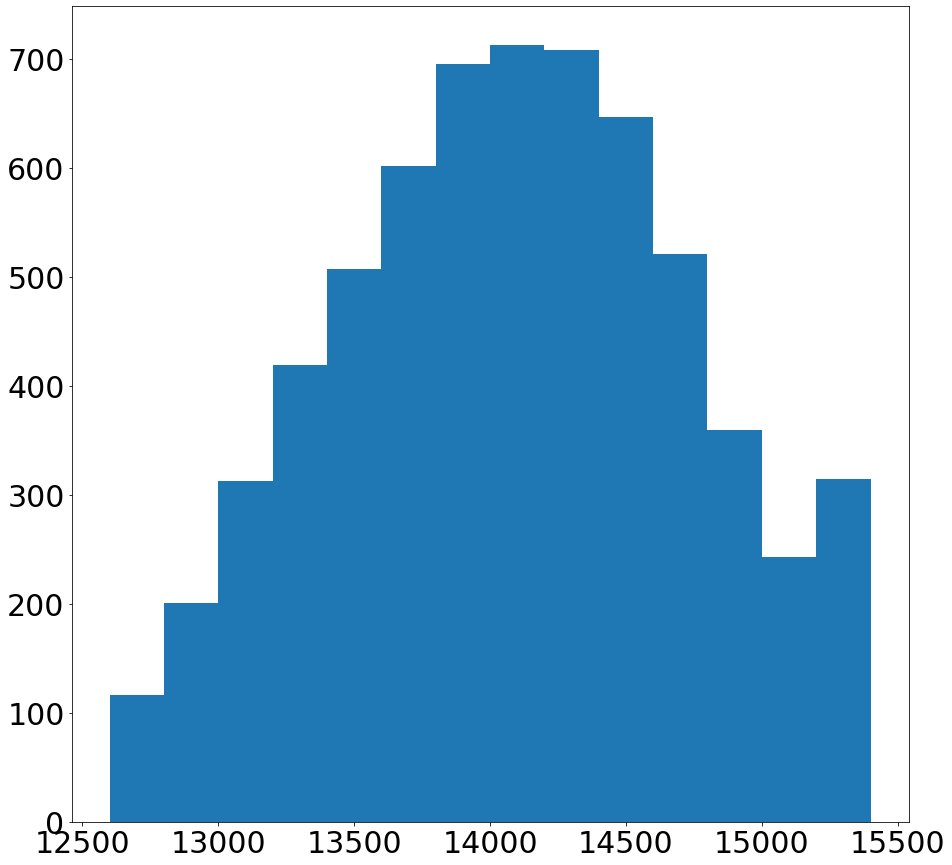

In [265]:
plt.hist(dp_val['age'].values,weights=weight,density=False,bins=14)

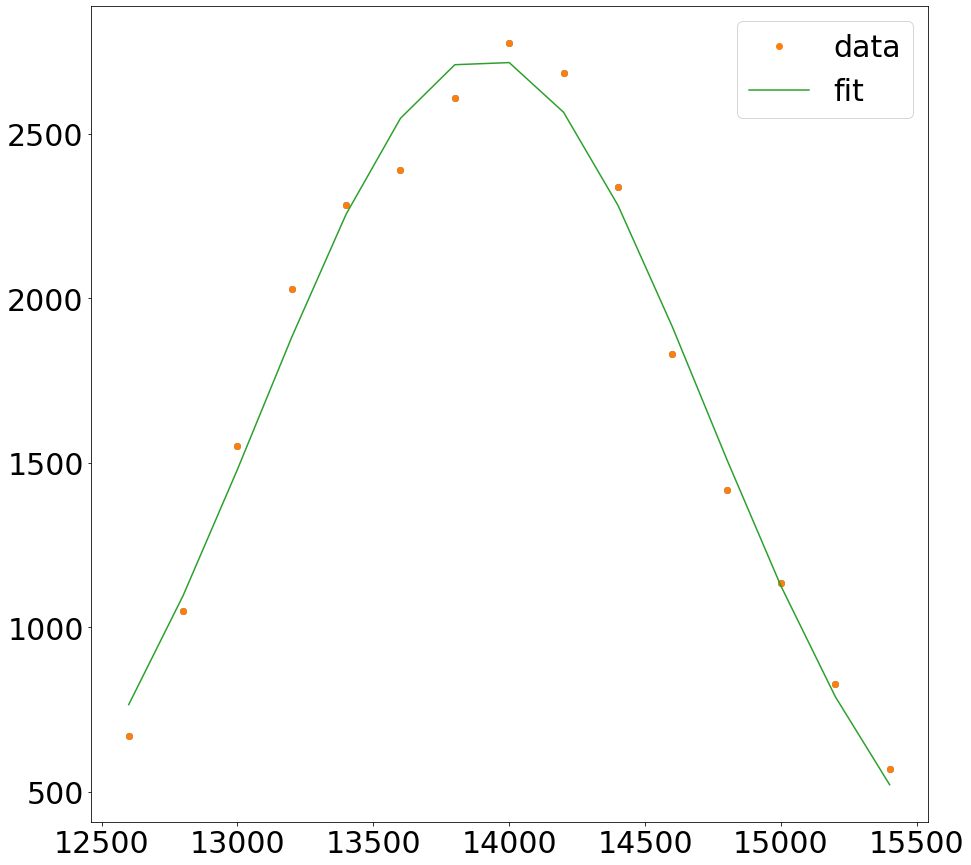

In [288]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
xdata = [12600., 12800., 13000., 13200., 13400., 13600., 13800., 14000.,
        14200., 14400., 14600., 14800., 15000., 15200., 15400.]
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def gauss(x, A, x0, sigma):
    y = A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
    return y
parameters, covariance = curve_fit(gauss, xdata, ydata,p0=[100,14000,800])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]

fit_y = gauss(xdata, fit_A, fit_B, fit_C)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()




In [289]:
parameters

array([ 2734.0399474 , 13908.01168739,   819.60581958])

In [196]:
dp = pd.read_csv('inputparams1',sep='\s+',names=['1','2','num','age'])
dp

,1,2,num,age
0,python,runlauncher.py,10002,13600
1,python,runlauncher.py,10029,13400
2,python,runlauncher.py,10045,13000
3,python,runlauncher.py,10045,14000
4,python,runlauncher.py,10096,13600
...,...,...,...,...
1095,python,runlauncher.py,19994,13200
1096,python,runlauncher.py,19994,14000
1097,python,runlauncher.py,19994,14200
1098,python,runlauncher.py,19997,13400


In [208]:
os.chdir('/home/mying/Desktop/outchi2_ref')
chi2_min = []
for i in range(1100):
    num = dp['num'].values[i]
    age = dp['age'].values[i]
    try:
        dp_temp = pd.read_csv("chi2_a{}_mc{}".format(str(int(age)),str(int(num)))).sort_values(by=['chi2'])
        chi2_min.append(np.append(dp_temp.iloc[0].values,int(num)))
    except:
        pass
    

In [209]:
len(chi2_min)

1056

In [255]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [259]:
weighted_quantile(dp_val['red'].values, [0.16, 0.5, 0.84], sample_weight=weight)

array([0.  , 0.  , 0.01])

In [264]:
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [290]:
max(dp_val['red'].values)

0.05

In [291]:
len(dp_val['red'].values)

26164